In [1]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
os.chdir(r'C:\Users\shubham\Desktop\case_study_python\10 Association Rules Mining and Recommendation Systems')

In [17]:
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=',', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

books = pd.read_csv('BX-Books.csv', sep=',', error_bad_lines=False, encoding="latin-1")

books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher']
users = pd.read_csv('BX-Users.csv', sep=',', error_bad_lines=False, encoding="latin-1")

users.columns = ['userID', 'Location', 'Age']



In [18]:
books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271374,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271375,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271377,192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [20]:
print(books.shape)

print(users.shape)

print(ratings.shape)



(271379, 5)
(278859, 3)
(1048575, 3)


In [21]:
pd.set_option('display.max_colwidth', -1)


In [131]:
books.yearOfPublication.unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984., 1968., 1961., 1958., 1974., 1976., 1971., 1977., 1975.,
       1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966., 1920.,
       1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969., 1954.,
       1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946., 1936.,
       1930., 1925., 1948., 1943., 1947., 1945., 1923., 1939., 1926.,
       1938., 1911., 1904., 1949., 1932., 1928., 1929., 1927., 1931.,
       1914., 1934., 1910., 1933., 1902., 1924., 1921., 1900., 1944.,
       1917., 1901., 1908., 1906., 1935., 1806., 2006., 1909., 1378.,
       1919., 1922., 1897., 1376.])

In [119]:
books.loc[books.yearOfPublication == 'DK Publishing Inc',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [118]:
books.loc[books.ISBN == '789466953','yearOfPublication'] = 2000

books.loc[books.ISBN == '789466953','bookAuthor'] = 'James Buckley'

books.loc[books.ISBN == '789466953','publisher'] = "DK Publishing Inc"

books.loc[books.ISBN == '789466953','bookTitle'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'

In [40]:
books.loc[books.ISBN == '330482750','yearOfPublication'] = 2000

books.loc[books.ISBN == '330482750','bookAuthor'] = "Amit Chaudhuri"

books.loc[books.ISBN == '330482750','publisher'] = "Amit Chaudhuri"

books.loc[books.ISBN == '330482750','bookTitle'] = 'Three Novels: A Strange and Sublime Address,Afternoon Raag,Freedom Song'

In [36]:
books.loc[books.ISBN == '735201994','yearOfPublication'] = 2000

books.loc[books.ISBN == '735201994','bookAuthor'] = "John Peterman"

books.loc[books.ISBN == '735201994','publisher'] = "John Peterman"

books.loc[books.ISBN == '735201994','bookTitle'] = 'Peterman Rides Again: Adventures Continue with the Real Through Life &ampthe Catalog Business'

In [123]:
books.yearOfPublication=pd.to_numeric(books.yearOfPublication, errors='coerce')

In [127]:
books.loc[(books.yearOfPublication > 2006) | (books.yearOfPublication == 0),'yearOfPublication'] = np.NAN

In [130]:
books.yearOfPublication.fillna(round(books.yearOfPublication.mean()), inplace=True)

In [132]:
books.yearOfPublication.isnull().sum()

0

In [133]:
books.yearOfPublication = books.yearOfPublication.astype(np.int32)

In [136]:
books.loc[books.publisher.isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [135]:
books.loc[books.publisher.isnull(),'publisher']='others'

In [138]:
books.loc[books.bookTitle.isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [139]:
books.loc[books.ISBN.isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [141]:
books.loc[books.bookAuthor.isnull(),'book_author']='others'

In [445]:
books=books.dropna()

In [142]:
books.loc[books.publisher.isnull(),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,book_author


In [147]:
books = books.drop(columns=['book_author'])

In [148]:
books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271374,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271375,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271376,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004,HarperSanFrancisco
271377,192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [149]:
new_books = books.copy()

In [150]:
new_books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271374,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271375,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271376,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004,HarperSanFrancisco
271377,192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [152]:
books

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271374,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271375,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271376,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004,HarperSanFrancisco
271377,192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [153]:
new_books.to_csv(r'C:\Users\shubham\Desktop\case_study_python\10 Association Rules Mining and Recommendation Systems\books.csv')


In [170]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34


In [163]:
users.userID.dtype

dtype('int32')

In [156]:
users.userID=pd.to_numeric(users.userID, errors='coerce')

In [161]:
users.userID.fillna(round(users.userID.mean()), inplace=True)

In [162]:
users.userID = users.userID.astype(np.int32)

In [166]:
print (sorted(users.Age.unique()))


[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [167]:
users.loc[(users.Age > 90) | (users.Age < 5), 'Age'] = np.nan

In [168]:
users.Age = users.Age.fillna(users.Age.mean())

In [169]:
users.Age = users.Age.astype(np.int32)

In [171]:
print (sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


In [180]:
users.loc[users.Location.isnull(),'Location']='others'

In [181]:
new_users = users.copy()

In [183]:
new_users['Location'].isnull().any()

False

In [184]:
new_users.to_csv(r'C:\Users\shubham\Desktop\case_study_python\10 Association Rules Mining and Recommendation Systems\users.csv')


In [185]:
ratings.shape

(1048575, 3)

In [186]:
n_users = users.shape[0]
n_books = books.shape[0]
n_users*n_books

75676476561

In [187]:
ratings.isnull().any()

userID        False
ISBN          False
bookRating    False
dtype: bool

In [188]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings = ratings[ratings.userID.isin(users.userID)]

In [189]:
ratings_new.shape

(941148, 3)

In [190]:
print ("number of users: " + str(n_users))

print ("number of books: " + str(n_books))

number of users: 278859
number of books: 271379


In [193]:
sparsity=1.0-len(ratings_new)/float(n_users*n_books)

print ('The sparsity level of Book Crossing dataset is ' + str(sparsity*100) + ' %')



The sparsity level of Book Crossing dataset is 99.99875635330453 %


In [194]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [195]:
ratings_explicit = ratings_new[ratings_new.bookRating != 0]

ratings_implicit = ratings_new[ratings_new.bookRating == 0]



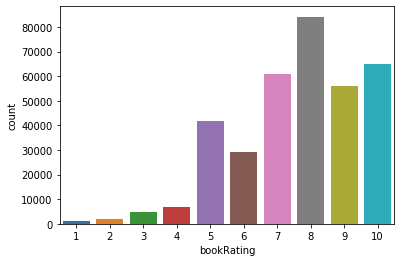

In [197]:
sns.countplot(data = ratings_explicit,x='bookRating')


In [200]:
users_exp_ratings = users[users.userID.isin(ratings_explicit.userID)]

users_imp_ratings = users[users.userID.isin(ratings_implicit.userID)]



In [201]:
counts1 = ratings_explicit['userID'].value_counts()

ratings_explicit = ratings_explicit[ratings_explicit['userID'].isin(counts1[counts1 >= 100].index)]

counts = ratings_explicit['bookRating'].value_counts()

ratings_explicit = ratings_explicit[ratings_explicit['bookRating'].isin(counts[counts >= 100].index)]

In [206]:
ratings_matrix = ratings_explicit.pivot_table(index = 'userID',columns = 'ISBN' , values = 'bookRating')
user_id = ratings_matrix.index
isbn = ratings_matrix.columns
ratings_matrix.shape
ratings_matrix.head()

ISBN,000104687X,000104799X,000223257X,000225056X,000225929X,000433549X,000470973X,000611962X,000647425X,000648302X,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [207]:
n_users = ratings_matrix.shape[0] 

n_books = ratings_matrix.shape[1]

print (n_users, n_books)

413 63915


In [208]:

ratings_matrix.fillna(0, inplace = True)

ratings_matrix = ratings_matrix.astype(np.int32)

 

In [209]:
ratings_matrix.head(5)



ISBN,000104687X,000104799X,000223257X,000225056X,000225929X,000433549X,000470973X,000611962X,000647425X,000648302X,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4017,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [212]:
sparsity=1.0-len(ratings_explicit)/float(users_exp_ratings.shape[0]*n_books)

print ('The sparsity level of Book Crossing dataset is ' + str(sparsity*100) + ' %')

The sparsity level of Book Crossing dataset is 99.99755453307485 %


In [214]:
global metric,k

k=10

metric='cosine'

In [215]:
from sklearn.neighbors import NearestNeighbors
import ipywidgets as widgets
from ipywidgets import IntSlider, Output
from IPython.display import display
from IPython.display import clear_output
import sys
import subprocess
from subprocess import *
from subprocess import STDOUT


In [216]:
def findksimilarusers(user_id,ratings,metric=metric,k=k):
    similarities = []
    indces = []
    model_knn = NearestNeighbors(metric=metric,algorithm = 'brute')
    model_knn.fit(ratings)
    loc = ratings.index.get_loc(user_id)
    distances , indices = model_knn.kneighbors(ratings.iloc[loc,:].values.reshape(1,-1),n_neighbors=k+1)
    similarities = 1-distances.flatten()
    return similarities, indices

In [217]:
def predict_userbased(user_id,item_id,ratings,metric=metric,k=k):
    pediction = []
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities,indices = findksimilarusers(user_id,ratings,metric, k)
    mean_rating = ratings.iloc[user_loc,:].mean()
    sum_wt = np.sum(similarities)-1
    product = 1
    wtd_sum = 0
    for i in range(0,len(indices.flatten())):
        if indices.flatten()[i]==user_loc:
            continue
        else:
            ratings_diff = ratings.iloc[indices.flatten()[i],item_loc]-np.mean(ratings.iloc[indices.flatten()[i],:])
            product = ratings_diff*(similarities[i])
            wtd_sum = wtd_sum + product
    prediction = int(round(mean_rating+(wtd_sum/sum_wt)))
    if prediction<=0:
        pediction = 1
    elif prediction>10:
        prediction = 10
    print ('\n predicted rating for user {0} -> item {1}:{2}'.format(user_id,item_id,prediction))
    return prediction
        

In [230]:
ratings.loc[ratings['userID']==11676]

,userID,ISBN,bookRating
45326,11676,9022906116,7
45327,11676,"\0432534220\""""",6
45328,11676,"\2842053052\""""",7
45329,11676,0 7336 1053 6,0
45330,11676,0=965044153,7
...,...,...,...
58923,11676,O77O428452,0
58924,11676,O805063196,0
58925,11676,O9088446X,8
58926,11676,X000000000,10


In [261]:
predict_userbased(11676,'000104799X',ratings_matrix);


 predicted rating for user 11676 -> item 000104799X:1


In [264]:
from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout

In [237]:
#from contextlib import redirect_stdout, contextmanager
#import os


#@contextmanager
#def suppress():
#    with open(os.devnull, "w") as null:
#        with redirect_stdout(null):
#            yield

In [278]:
#This function utilizes above functions to recommend items for item/user based approach and cosine/correlation.​​ 

#Recommendations are made if the predicted rating for an item is >= to 6,and the items have not been rated already

def recommendItem(user_id, ratings, metric=metric):
    if (user_id not in ratings.index.values) or type(user_id) is not int:
        print ("User id should be a valid integer from this list  ")
    else:
        ids = ['Item-based (correlation)','Item-based (cosine)','User-based (correlation)','User-based (cosine)']
        select = widgets.Dropdown(options=ids, value=ids[0],description='Select approach', width='1000px')
        def on_change(change):
            clear_output(wait=True)
            prediction = []
            if change['type'] == 'change' and change['name'] == 'value':
                if (select.value == 'Item-based (correlation)') | (select.value == 'User-based (correlation)') :
                    metric = 'correlation'
                else:
                    metric = 'cosine'
                
                with suppress_stdout():
                    if (select.value == 'Item-based (correlation)') | (select.value == 'Item-based (cosine)'):
                        for i in range(ratings.shape[1]):
                            if (ratings[str(ratings.columns[i])][user_id] !=0):
                                prediction.append(predict_itembased(user_id, str(ratings.columns[i]) ,ratings, metric))
                            else:
                                prediction.append(-1)
                    else:
                        for i in range(ratings.shape[1]):
                            if (ratings[str(ratings.columns[i])][user_id] !=0): #not rated already
                                prediction.append(predict_userbased(user_id, str(ratings.columns[i]) ,ratings, metric))
                            else:
                                prediction.append(-1)
                prediction = pd.Series(prediction)      
                prediction = prediction.sort_values(ascending=False)
                recommended = prediction[:10]
                print ("As per {0} approach....Following books are recommended...".format(select.value))
                for i in range(len(recommended)):
                    print ("{0}. {1}".format(i+1,books.bookTitle[recommended.index[i]].encode('utf-8')))
        select.observe(on_change)
        display(select)


In [279]:
recommendItem(4385, ratings_matrix)